In [82]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import joblib 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
# Creamos el dataframe

url = r'C:\Users\34722\Documents\DataScience\EjerciciosResueltos\Entregas\Prediccion_Coches_Usados\data\car_price_data1_limpio.csv'
dataframe = pd.read_csv(url)

In [25]:
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)

-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------


<Axes: title={'center': 'Precio vs Año'}, xlabel='Year', ylabel='Price'>

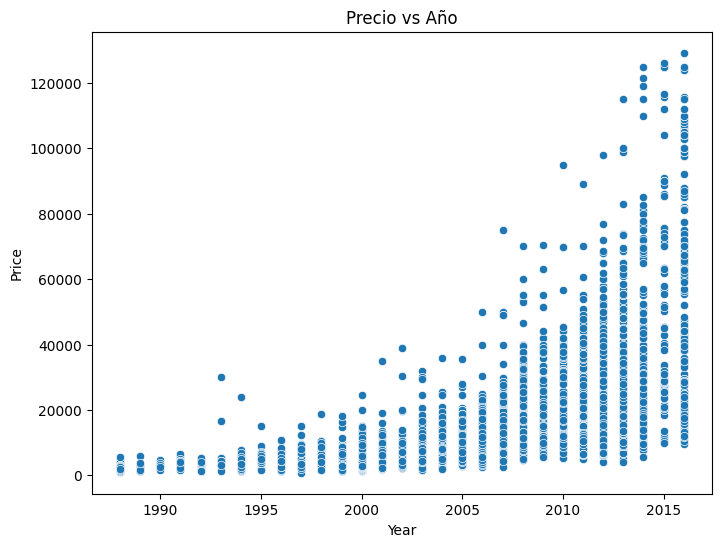

In [26]:
# Vemos la distribucion del precio conforme a la antiguedad del vehiculo

plt.figure(figsize=[8,6])
plt.title("Precio vs Año")
sns.scatterplot(x='Year',y='Price',data=dataframe)

<Axes: title={'center': 'Precio vs Kilometraje'}, xlabel='Price', ylabel='Mileage'>

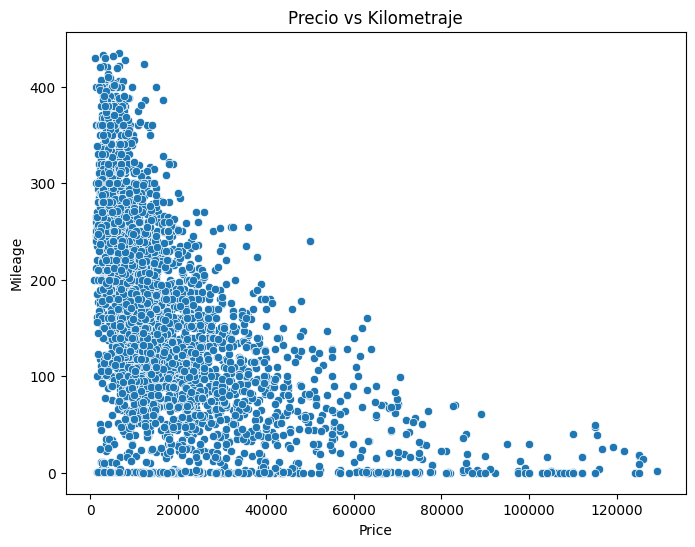

In [27]:
# Vemos la distribución del precio del coche en funcion de su kilometraje

plt.figure(figsize=[8,6])
plt.title("Precio vs Kilometraje")
sns.scatterplot(x='Price',y='Mileage',data=dataframe)

In [28]:
variables = dataframe[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.806421,Mileage
1,4.035876,Year
2,1.304621,EngineV


In [29]:
dataframe_limpio = dataframe.drop('Year',axis=1)
dataframe_limpio.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,4200.0,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes
3,Audi,23000.0,crossover,240,4.2,Petrol,yes
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes


In [30]:
dataframe_limpio2=dataframe_limpio

In [31]:
dummies = pd.get_dummies(dataframe_limpio2,drop_first=True)

In [32]:
# Dividimos en x e y
X = dummies.drop('Price',axis=1)
y = dummies['Price']

In [33]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(dummies,y,test_size=0.2, random_state=365)

In [34]:
# Añadimos los datos estandarizados a la x
X = X.drop(['Mileage','EngineV'],axis=1)
X.head()

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [35]:
# Modelo 1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train,y_train)


y_pred_lr = lr.predict(X_test)

r = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 1.0
RMSE : 8.837186804544546e-12


In [36]:
# Modelo 2
rf = RandomForestRegressor()


rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

r = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.9999623979242167
RMSE : 118.70892353262548


In [37]:
# Modelo 3
gbt = GradientBoostingRegressor()


gbt.fit(X_train,y_train)


y_pred_gbt = gbt.predict(X_test)

r = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.9999217320281382
RMSE : 171.26534616105442


In [38]:
lr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reglog", LinearRegression())])

gbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", GradientBoostingRegressor())])

xgbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", xgb.XGBRegressor())])


rf = RandomForestRegressor()

lr_param = {

}

gbt_param = {

}

xgbt_param = {
    # "xgbt__objective": ["reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:absoluteerror"]
}

rf_param = {
    'n_estimators': [10,100,500],
    'max_features': [1,2,3]
}

gs_lr = GridSearchCV(lr,
lr_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_gbt = GridSearchCV(gbt,
gbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_rf = GridSearchCV(rf,
rf_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_xgbt = GridSearchCV(xgbt,
xgbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_lr": gs_lr,
    "gs_gbt": gs_gbt,
    "gs_xgbt": gs_xgbt,
    "gs_rg": gs_rf

}

In [39]:
%%time 
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: total: 2.95 s
Wall time: 9.92 s


In [40]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
0,gs_lr,1.000000
2,gs_xgbt,0.999899
1,gs_gbt,0.999894
3,gs_rg,0.984824


In [41]:
print('-'*50,'FORMA 2','-'*50)
print('-'*40,'TRANSFORMACION LOGARÍTMICA','-'*41)
print('-'*50,'FORMA 2','-'*50)
print('-'*40,'TRANSFORMACION LOGARÍTMICA','-'*41)
print('-'*50,'FORMA 2','-'*50)
print('-'*40,'TRANSFORMACION LOGARÍTMICA','-'*41)
print('-'*50,'FORMA 2','-'*50)
print('-'*40,'TRANSFORMACION LOGARÍTMICA','-'*41)
print('-'*50,'FORMA 2','-'*50)
print('-'*40,'TRANSFORMACION LOGARÍTMICA','-'*41)
print('-'*50,'FORMA 2','-'*50)

-------------------------------------------------- FORMA 2 --------------------------------------------------
---------------------------------------- TRANSFORMACION LOGARÍTMICA -----------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
---------------------------------------- TRANSFORMACION LOGARÍTMICA -----------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
---------------------------------------- TRANSFORMACION LOGARÍTMICA -----------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
---------------------------------------- TRANSFORMACION LOGARÍTMICA -----------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
----------

In [42]:
# Creamos el dataframe

url = r'C:\Users\34722\Documents\DataScience\EjerciciosResueltos\Entregas\Prediccion_Coches_Usados\data\car_price_data1_limpio.csv'
dataframe = pd.read_csv(url)

In [43]:
# Hacemos una transformación logaritmica del precio
log_price = np.log(dataframe['Price'])

# Then we add it to our data frame
dataframe['log_price'] = log_price


dataframe.drop('Price',axis=1, inplace=True)
dataframe.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


<Axes: title={'center': 'Log precio vs Kilometraje'}, xlabel='Mileage', ylabel='log_price'>

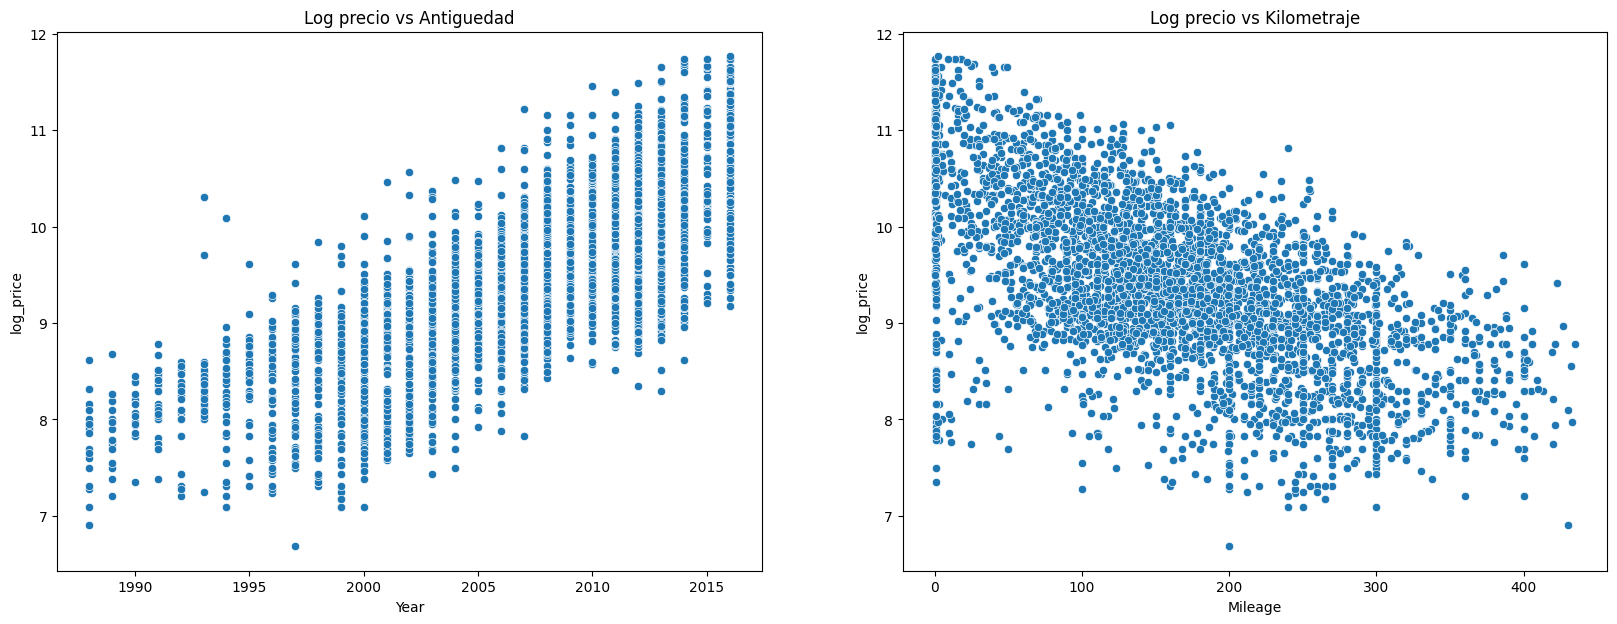

In [44]:
''' 
Vemos la distribución del precio de los coches 
en funcion de su antiguedad y kilometraje 
despues de hacer el logaritmo
'''
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
plt.title("Log precio vs Antiguedad")
sns.scatterplot(x='Year',y='log_price',data=dataframe)

plt.subplot(1,2,2)
plt.title("Log precio vs Kilometraje")
sns.scatterplot(y='log_price',x='Mileage',data=dataframe)

In [45]:
# Cojemos las variables numericas y eliminamos la que mas infle

variables = dataframe[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.806421,Mileage
1,4.035876,Year
2,1.304621,EngineV


In [46]:
dataframe_limpio = dataframe.drop('Year',axis=1)


In [47]:
dataframe_limpio.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [48]:
dataframe_limpio2=dataframe_limpio

In [49]:
dataframe_limpio= dataframe_limpio.drop(['Brand','Body','Registration','Engine Type'],axis=1)

In [50]:
dataframe_limpio2

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3885,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3886,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3887,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3888,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [51]:
data_cotrastar = dataframe_limpio2.copy()
for x in data_cotrastar.columns:
    if data_cotrastar[x].dtypes == 'object':
        encoder = LabelEncoder()
        data_cotrastar[x] = encoder.fit_transform(data_cotrastar[x])
        
print(abs(data_cotrastar.corrwith(data_cotrastar['log_price'])).sort_values(ascending=False)[1:])

Mileage         0.614974
Registration    0.462596
Body            0.385992
Brand           0.099101
EngineV         0.026306
Engine Type     0.014176
dtype: float64


<Axes: >

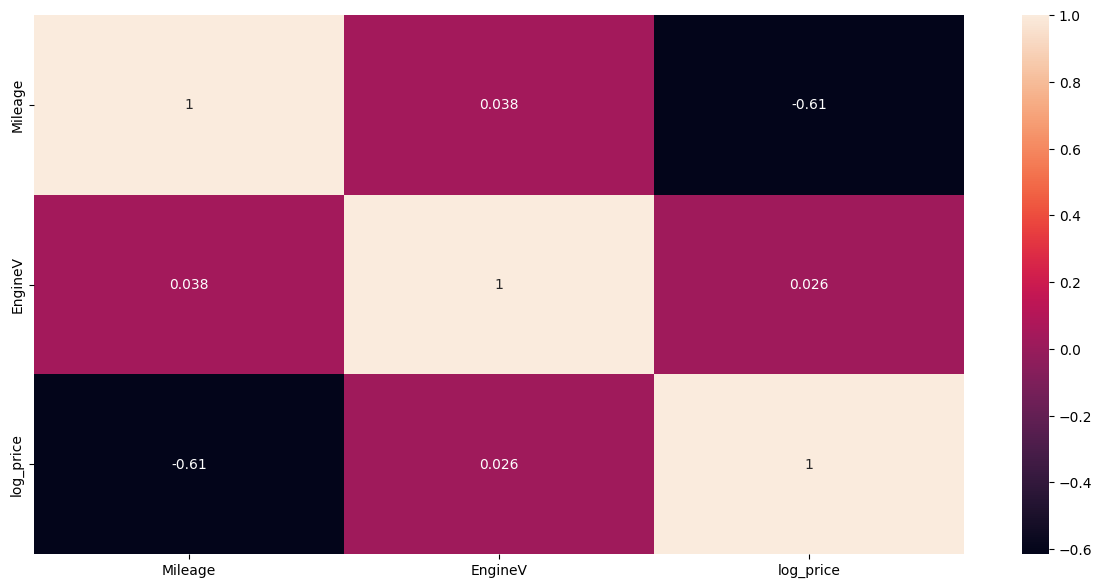

In [52]:
'''
VISUALIZAMOS LA CORRELACION SOLO CON LAS COLUMNAS NUMERICAS
PORQUE SOLO NOS PERMITE HACERLO CON COLUMNAS NUMERICAS
'''

plt.figure(figsize=[15,7])
sns.heatmap(dataframe_limpio.corr(), annot=True)

In [53]:
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)

------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------


In [54]:
# Dividimos en X e y para ver la importancia de las columnas
X = data_cotrastar.drop('log_price',axis=1)
y = data_cotrastar['log_price']
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

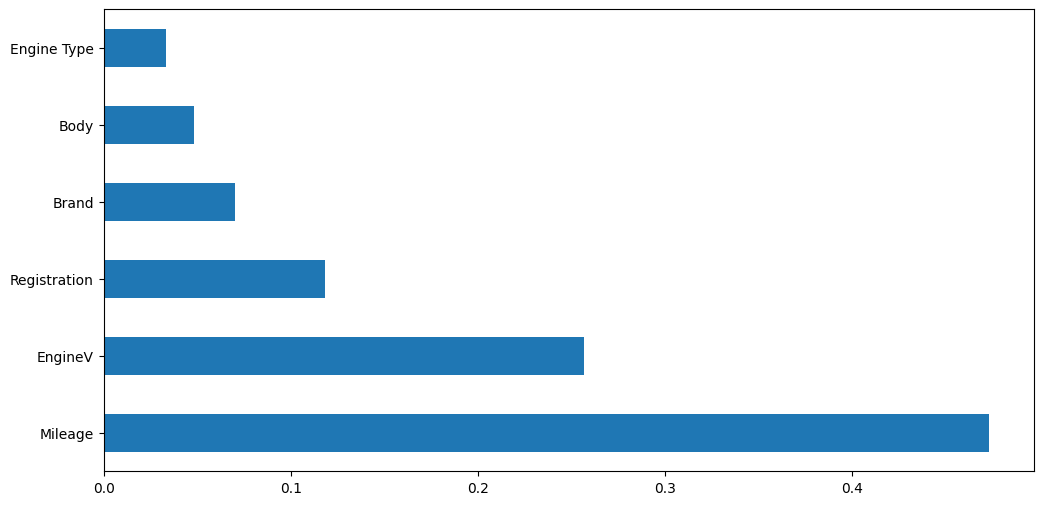

In [55]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [56]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.473372
EngineV         0.256699
Registration    0.118129
Brand           0.070198
Body            0.048234
Engine Type     0.033368
dtype: float64


In [57]:
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)

------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------


In [58]:
# Probamos con ExtraTrees

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

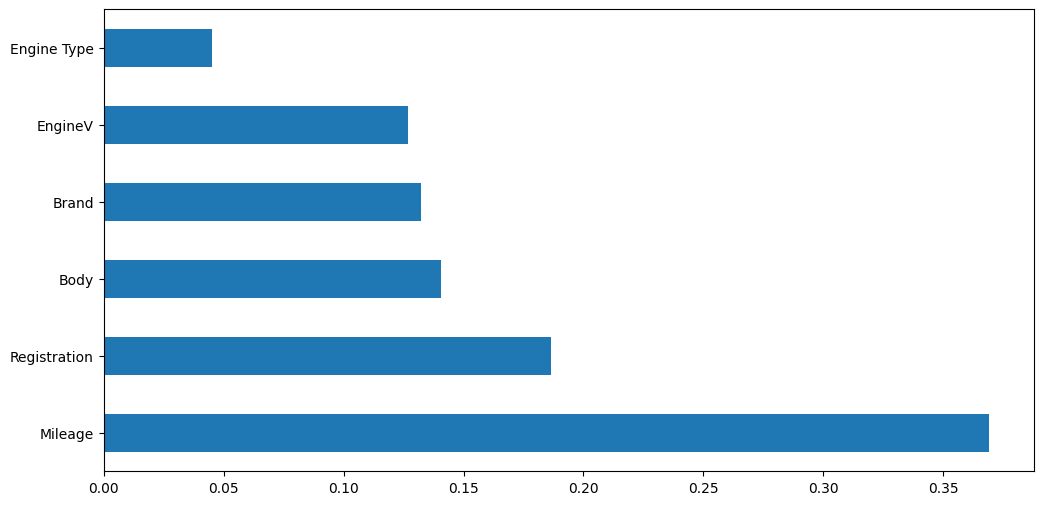

In [59]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [60]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.369132
Registration    0.186422
Body            0.140477
Brand           0.132132
EngineV         0.126795
Engine Type     0.045042
dtype: float64


In [61]:
# Hacemos un get dummies para categorizar las variables no numéricas (Marca...)

dummies = pd.get_dummies(dataframe_limpio2,drop_first=True)

In [62]:
dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


<Axes: >

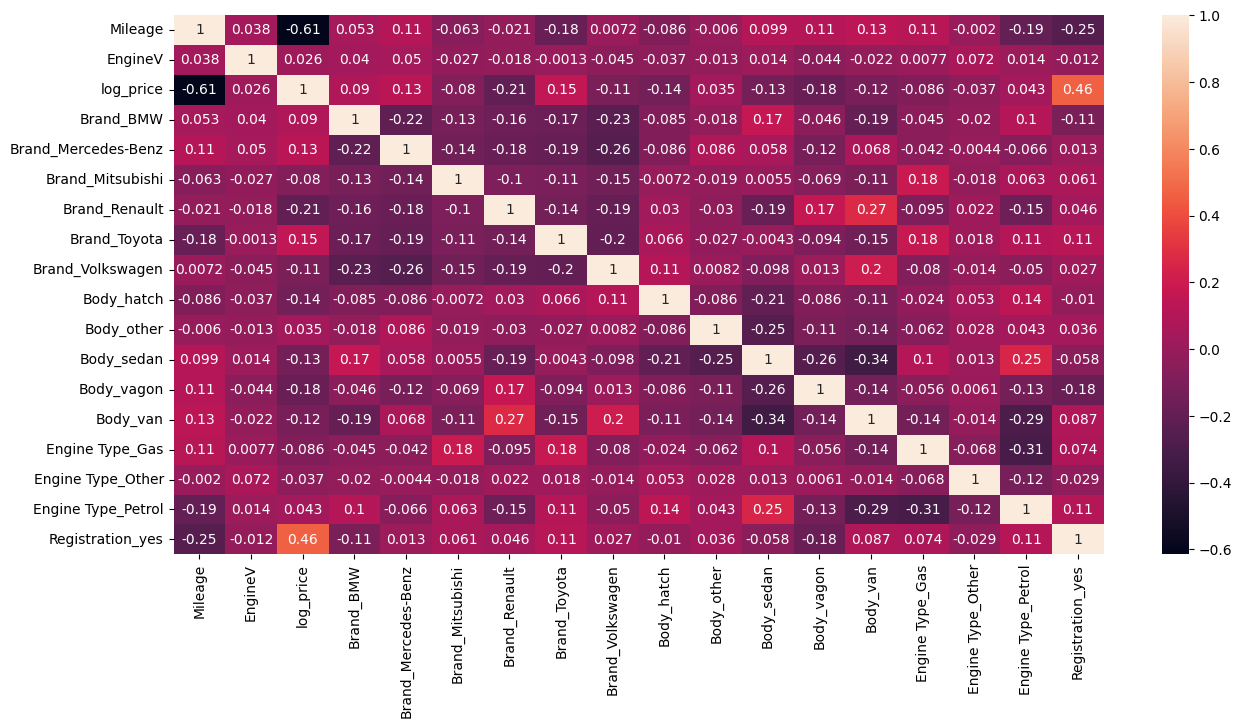

In [63]:
'''
VISUALIZAMOS LA CORRELACION SOLO CON LAS COLUMNAS NUMERICAS
PORQUE SOLO NOS PERMITE HACERLO CON COLUMNAS NUMERICAS
'''

plt.figure(figsize=[15,7])
sns.heatmap(dummies.corr(), annot=True)

In [64]:
# Dividimos en x e y
X = dummies.drop('log_price',axis=1)
y = dummies['log_price']

In [65]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=365)

In [66]:
lr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reglog", LinearRegression())])

gbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", GradientBoostingRegressor())])

xgbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", xgb.XGBRegressor())])


rf = RandomForestRegressor()

lr_param = {

}

gbt_param = {

}

xgbt_param = {
    # "xgbt__objective": ["reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:absoluteerror"]
}

rf_param = {
    'n_estimators': [10,100,500],
    'max_features': [1,2,3]
}

gs_lr = GridSearchCV(lr,
lr_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_gbt = GridSearchCV(gbt,
gbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_rf = GridSearchCV(rf,
rf_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_xgbt = GridSearchCV(xgbt,
xgbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_lr": gs_lr,
    "gs_gbt": gs_gbt,
    "gs_xgbt": gs_xgbt,
    "gs_rg": gs_rf

}

In [67]:
%%time 
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: total: 2.69 s
Wall time: 19.2 s


In [68]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
3,gs_rg,0.783167
2,gs_xgbt,0.778437
1,gs_gbt,0.776626
0,gs_lr,0.707701


In [69]:
print('-'*50,'FORMA 3','-'*50)
print('-'*40,'SIN ELIMINAR  COLUMNA YEAR','-'*41)
print('-'*50,'FORMA 3','-'*50)
print('-'*40,'SIN ELIMINAR  COLUMNA YEAR','-'*41)
print('-'*50,'FORMA 3','-'*50)
print('-'*40,'SIN ELIMINAR  COLUMNA YEAR','-'*41)
print('-'*50,'FORMA 3','-'*50)
print('-'*40,'SIN ELIMINAR  COLUMNA YEAR','-'*41)
print('-'*50,'FORMA 3','-'*50)
print('-'*40,'SIN ELIMINAR  COLUMNA YEAR','-'*41)
print('-'*50,'FORMA 3','-'*50)

-------------------------------------------------- FORMA 3 --------------------------------------------------
---------------------------------------- SIN ELIMINAR  COLUMNA YEAR -----------------------------------------
-------------------------------------------------- FORMA 3 --------------------------------------------------
---------------------------------------- SIN ELIMINAR  COLUMNA YEAR -----------------------------------------
-------------------------------------------------- FORMA 3 --------------------------------------------------
---------------------------------------- SIN ELIMINAR  COLUMNA YEAR -----------------------------------------
-------------------------------------------------- FORMA 3 --------------------------------------------------
---------------------------------------- SIN ELIMINAR  COLUMNA YEAR -----------------------------------------
-------------------------------------------------- FORMA 3 --------------------------------------------------
----------

In [70]:
# Creamos el dataframe

url = r'C:\Users\34722\Documents\DataScience\EjerciciosResueltos\Entregas\Prediccion_Coches_Usados\data\car_price_data1_limpio.csv'
dataframe = pd.read_csv(url)

In [71]:
# Hacemos una transformación logaritmica del precio
log_price = np.log(dataframe['Price'])

# Then we add it to our data frame
dataframe['log_price'] = log_price


dataframe.drop('Price',axis=1, inplace=True)
dataframe.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [72]:
dataframe_limpio = dataframe
dataframe_limpio2 = dataframe_limpio

In [73]:
data_cotrastar = dataframe_limpio2.copy()
for x in data_cotrastar.columns:
    if data_cotrastar[x].dtypes == 'object':
        encoder = LabelEncoder()
        data_cotrastar[x] = encoder.fit_transform(data_cotrastar[x])
        
print(abs(data_cotrastar.corrwith(data_cotrastar['log_price'])).sort_values(ascending=False)[1:])

Year            0.747137
Mileage         0.614974
Registration    0.462596
Body            0.385992
Brand           0.099101
EngineV         0.026306
Engine Type     0.014176
dtype: float64


In [74]:
dummies = pd.get_dummies(dataframe_limpio2,drop_first=True)

In [75]:
X = dummies.drop('log_price',axis=1)
y = dummies['log_price']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=365)

In [77]:
lr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reglog", LinearRegression())])

gbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", GradientBoostingRegressor())])

xgbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", xgb.XGBRegressor())])


rf = RandomForestRegressor()

lr_param = {

}

gbt_param = {

}

xgbt_param = {
    # "xgbt__objective": ["reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:absoluteerror"]
}

rf_param = {
    'n_estimators': [10,100,500],
    'max_features': [1,2,3]
}

gs_lr = GridSearchCV(lr,
lr_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_gbt = GridSearchCV(gbt,
gbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_rf = GridSearchCV(rf,
rf_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_xgbt = GridSearchCV(xgbt,
xgbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_lr": gs_lr,
    "gs_gbt": gs_gbt,
    "gs_xgbt": gs_xgbt,
    "gs_rf": gs_rf

}

In [78]:
%%time 
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: total: 2.47 s
Wall time: 9.93 s


In [79]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
2,gs_xgbt,0.913971
3,gs_rf,0.913711
1,gs_gbt,0.911285
0,gs_lr,0.843096


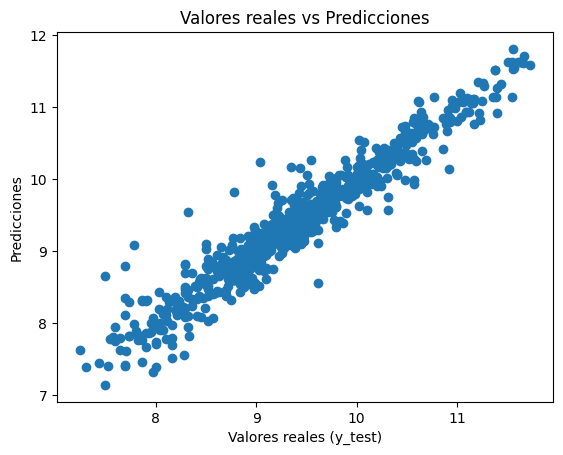

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes tus modelos entrenados y y_test disponible
# Suponiendo que tienes un modelo de regresión lineal llamado 'lr_model' como ejemplo

# Realiza las predicciones en el conjunto de prueba
y_pred = gs_xgbt.predict(X_test)  # Reemplaza lr_model por el modelo que desees graficar

# Grafica los datos reales vs las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Valores reales vs Predicciones")
plt.show()


In [83]:
# Exportamos el modelo que mejor metrica da entrenado

joblib.dump(gs_xgbt, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']